In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:08<00:00, 256MB/s]
100% 1.06G/1.06G [00:08<00:00, 135MB/s]


In [4]:
import zipfile
with zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')


In [24]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense , Conv2D , MaxPooling2D , Flatten , BatchNormalization , Dropout

### Generators - divide data in Batches , which get imported one by one and processed

In [8]:
train_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/train' ,
    labels = 'inferred' ,
    label_mode = 'int' ,
    batch_size = 32 ,
    image_size = (256,256)
)

validation_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/test' ,
    labels = 'inferred' ,
    label_mode = 'int' ,
    batch_size = 32 ,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
def process(image,label):
  image = tf.cast(image/255 , tf.float32)
  return image , label

train_ds = train_dataset.map(process)
validation_ds = validation_dataset.map(process)


In [32]:
# create CNN Model

model = Sequential()


model.add(Conv2D(32,kernel_size=(3,3),padding ='valid',activation = 'relu',input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding ='valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding ='valid',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_7 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_8 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [33]:
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])

In [34]:
history1 = model.fit(train_dataset,epochs=10,validation_data=validation_dataset)

Epoch 1/10
625/625 [==============================] - 72s 108ms/step - loss: 1.1877 - accuracy: 0.6061 - val_loss: 0.7447 - val_accuracy: 0.6628
Epoch 2/10
625/625 [==============================] - 65s 104ms/step - loss: 0.5625 - accuracy: 0.7177 - val_loss: 0.8004 - val_accuracy: 0.6784
Epoch 3/10
625/625 [==============================] - 64s 103ms/step - loss: 0.4991 - accuracy: 0.7648 - val_loss: 0.7406 - val_accuracy: 0.6428
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4354 - accuracy: 0.7991 - val_loss: 0.5166 - val_accuracy: 0.7414
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3584 - accuracy: 0.8416 - val_loss: 0.5262 - val_accuracy: 0.7514
Epoch 6/10
625/625 [==============================] - 64s 103ms/step - loss: 0.2972 - accuracy: 0.8737 - val_loss: 0.6064 - val_accuracy: 0.7400
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2148 - accuracy: 0.9119 - val_loss: 0.7848 - val_ac

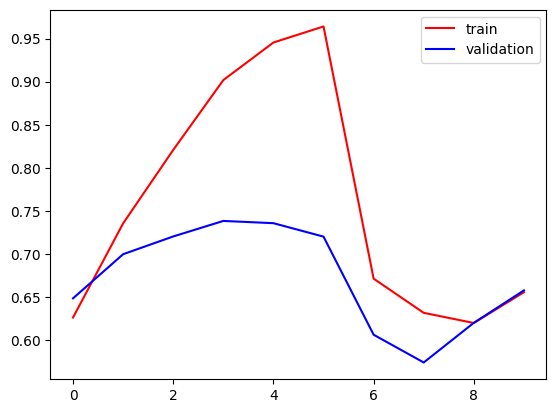

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

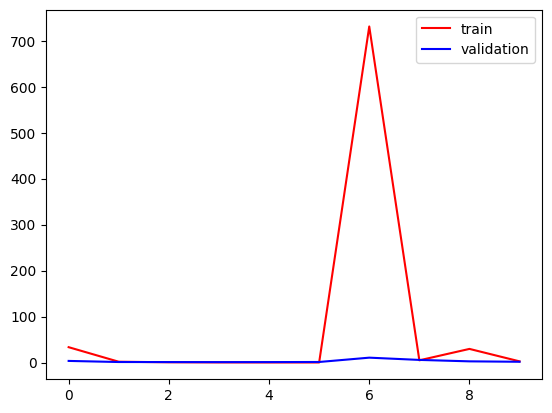

In [23]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

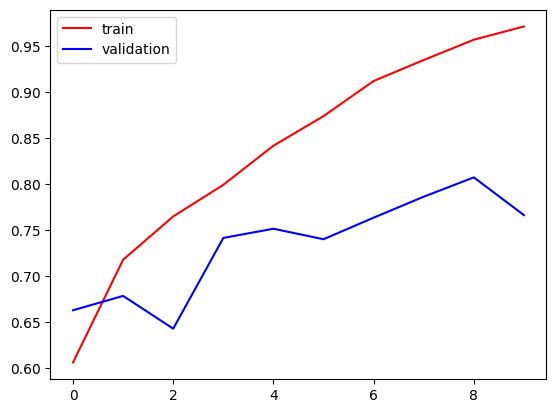

In [35]:
import matplotlib.pyplot as plt

plt.plot(history1.history['accuracy'],color='red',label='train')
plt.plot(history1.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

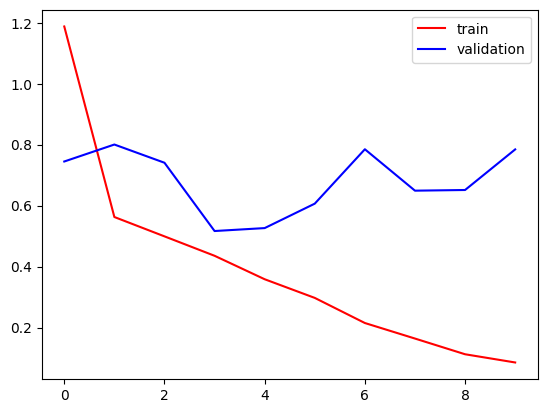

In [36]:
plt.plot(history1.history['loss'],color='red',label='train')
plt.plot(history1.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()